<a href="https://colab.research.google.com/github/Altaieb-Mohammed/pytorch-tutorial-YouTube-/blob/main/lab1m%20analisiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"

df = pd.read_csv(url)
print(df.head(6))


                                                text      debts  \
0  The estate is worth $801,536.08. There are deb...  136423.38   
1  The estate is worth $943,375.41. There are deb...  178819.05   
2  The estate is worth $678,251.95. There are deb...  137791.13   
3  The estate is worth $364,967.06. There are deb...   74310.09   
4  The estate is worth $663,414.47. There are deb...    2302.81   
5  The estate is worth $152,855.39. There are deb...     454.23   

   funeral_expenses   bequests  wife  husband  son  daughter  father  mother  \
0           7866.29   70554.96     1        0    5         4       0       0   
1           9078.99  150491.37     1        1    4         5       0       1   
2           6276.24   19846.02     1        1    3         5       0       0   
3           9243.89   81648.92     0        0    4         0       0       0   
4           7015.85   15827.62     1        1    3         2       1       0   
5           7859.73    1920.94     0        1    0

In [ ]:
#---------------------------------------------------------- Лабораторная работа №1:

# --- Загрузить данные из GitHub----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"

df = pd.read_csv(url)

# --- проверка признаков----------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Columns:", df.columns.tolist())

# Использование реальных имен столбцов из нашего набора данных----------------------------------------------------------------------------------------------------------------------------------------------------
numeric_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]

# ---  Чистые данные---
# Удалить строки с отсутствующими значениями в числовых столбцах------------------------------------------------------------------------------------------------------------------------------------------------
df_clean = df[numeric_features].dropna()

# удалить строки с неположительными значениями в финансовых столбцах.----------------------------------------------------------------------------------------------------------------------------------------------
for col in ['debts', 'funeral_expenses', 'bequests']:
    df_clean = df_clean[df_clean[col] > 0]

# --- Масштабирование ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_clean),
    columns=numeric_features
)

# Standard Scaling------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(
    standard_scaler.fit_transform(df_clean),
    columns=numeric_features
)

# ---  результаты  ------------------------------------------------------------------------------------------------------------
df_clean.to_csv('inheritance_cleaned.csv', index=False)
df_minmax.to_csv('inheritance_minmax_scaled.csv', index=False)
df_standard.to_csv('inheritance_standard_scaled.csv', index=False)

# ---  Preview ---------------------------------------------------------------------------------------------  Preview------------------------------------------------------------------------------------------------------
print("Cleaned data:\n", df_clean.head())
print("MinMax scaled:\n", df_minmax.head())
print("Standard scaled:\n", df_standard.head())


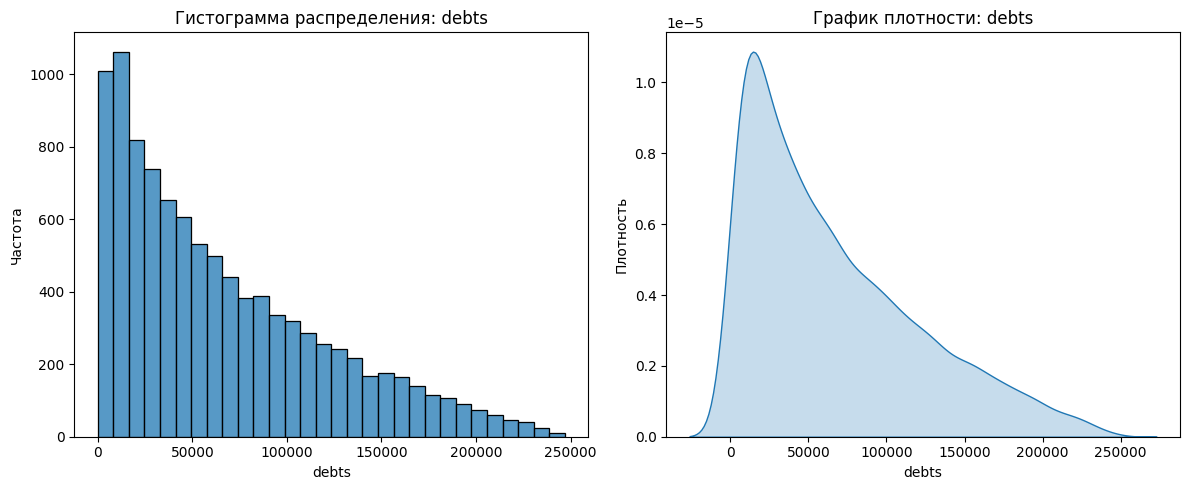

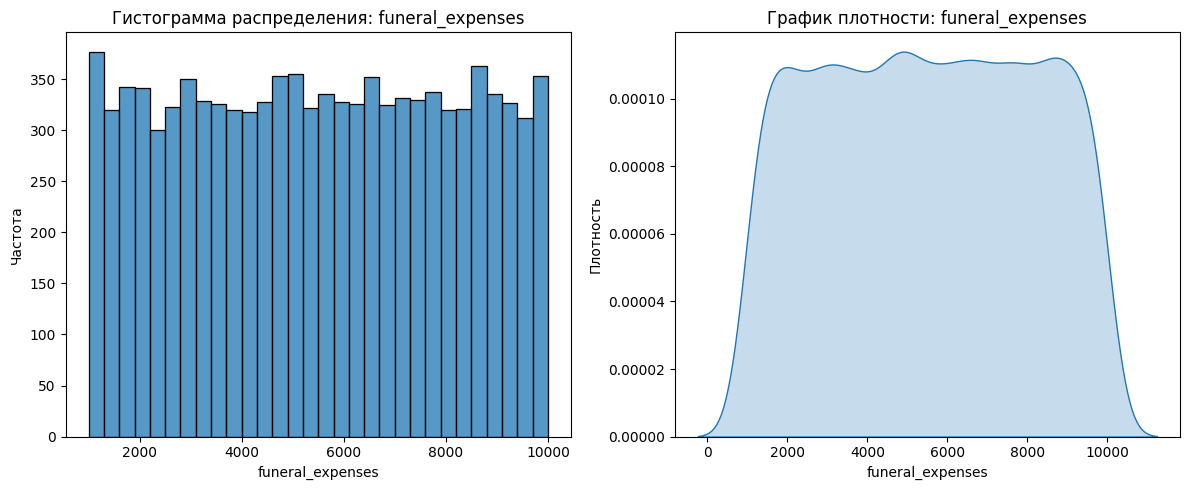

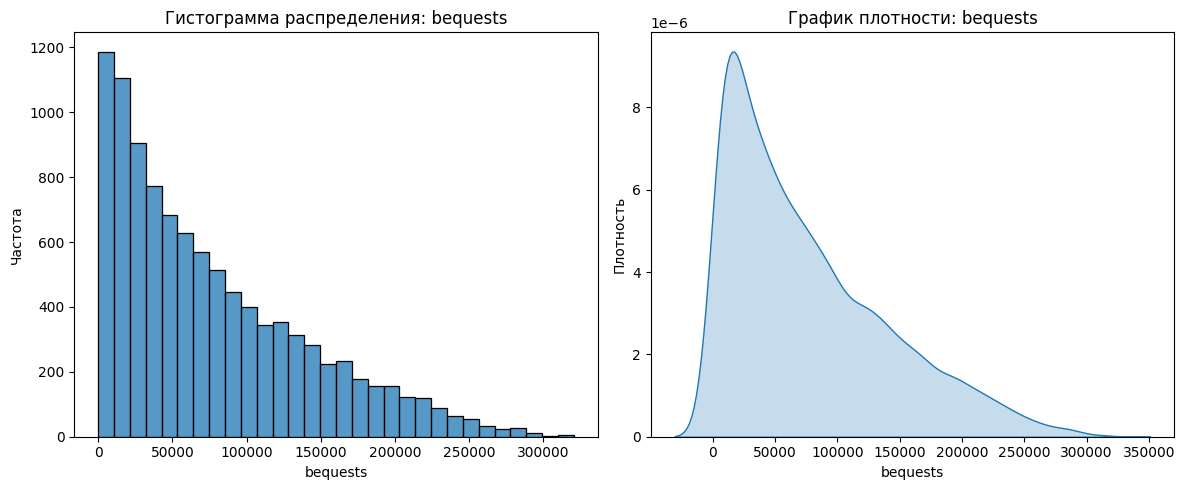

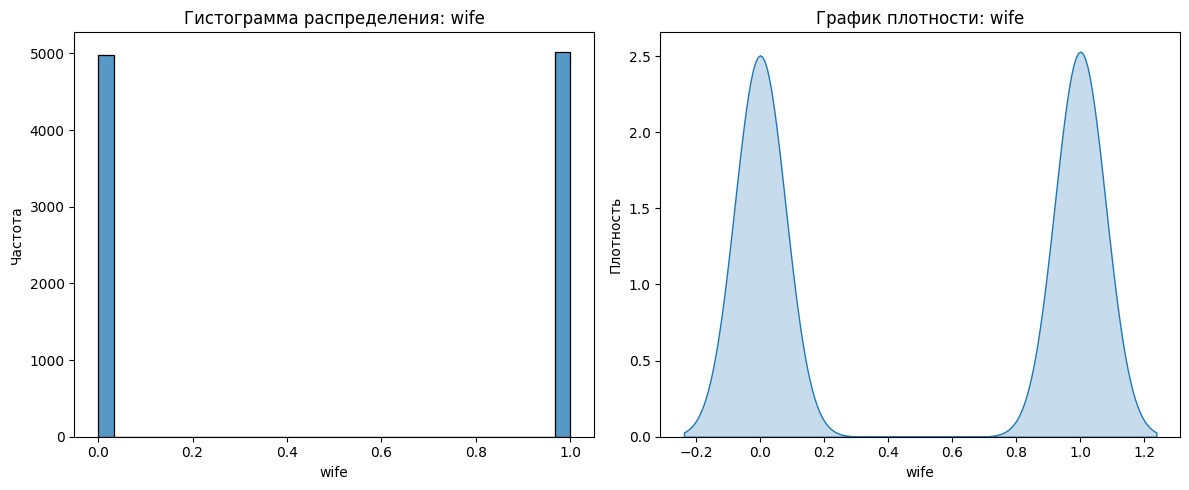

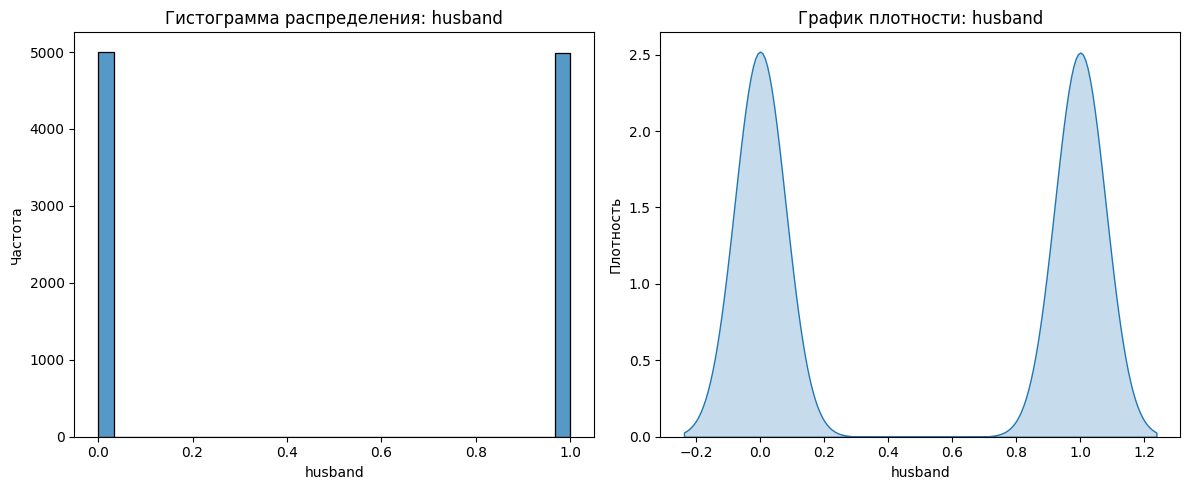

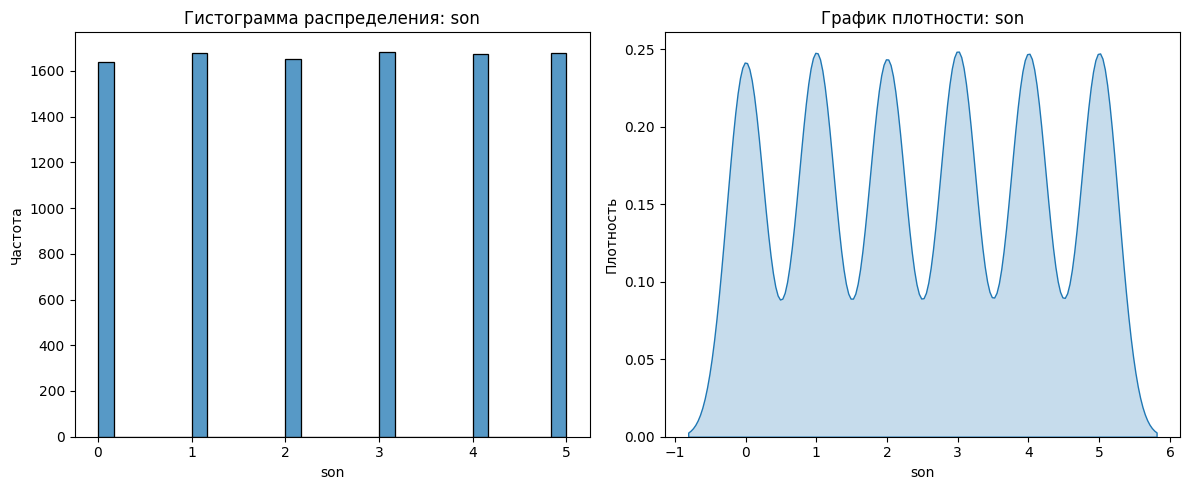

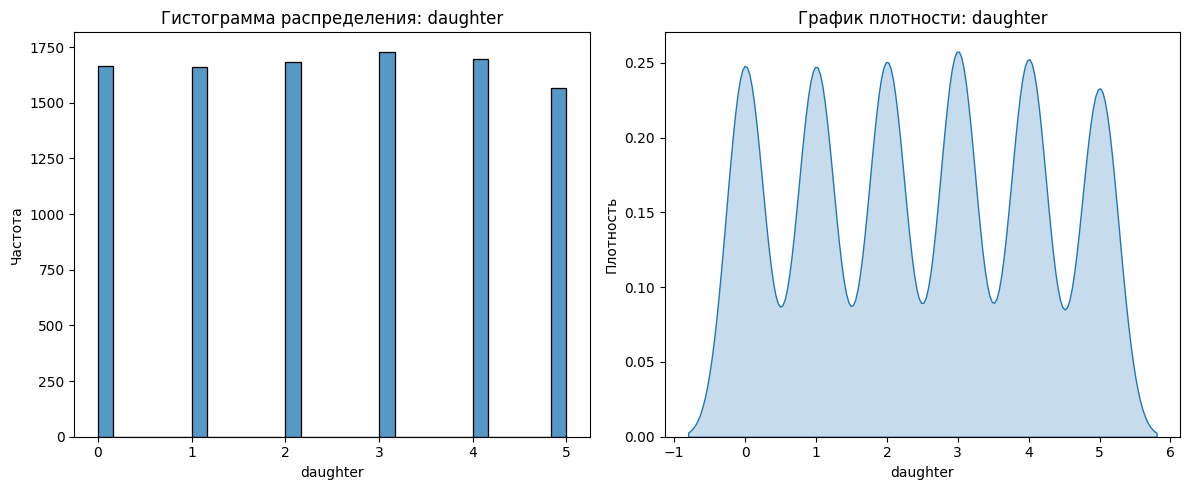

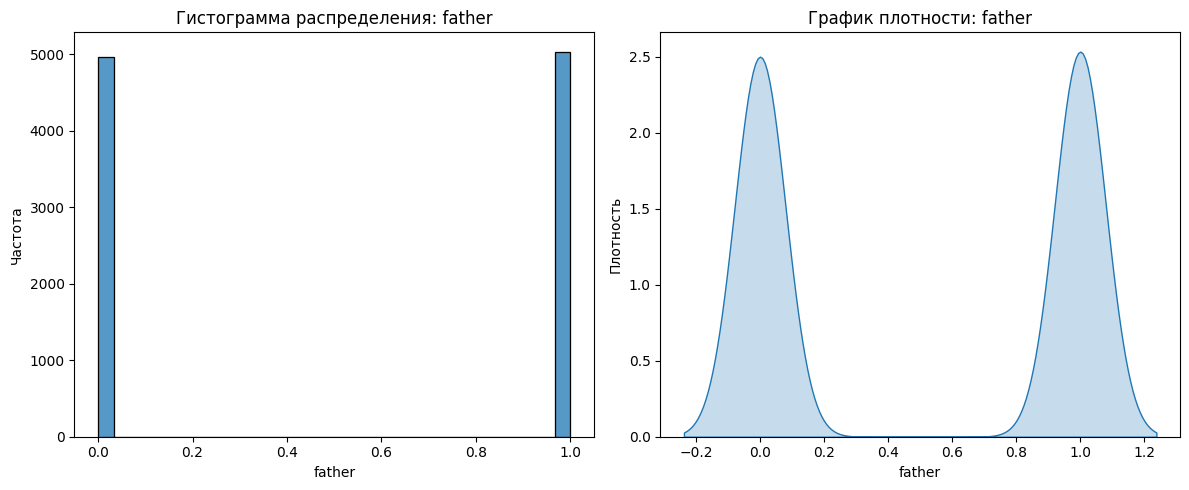

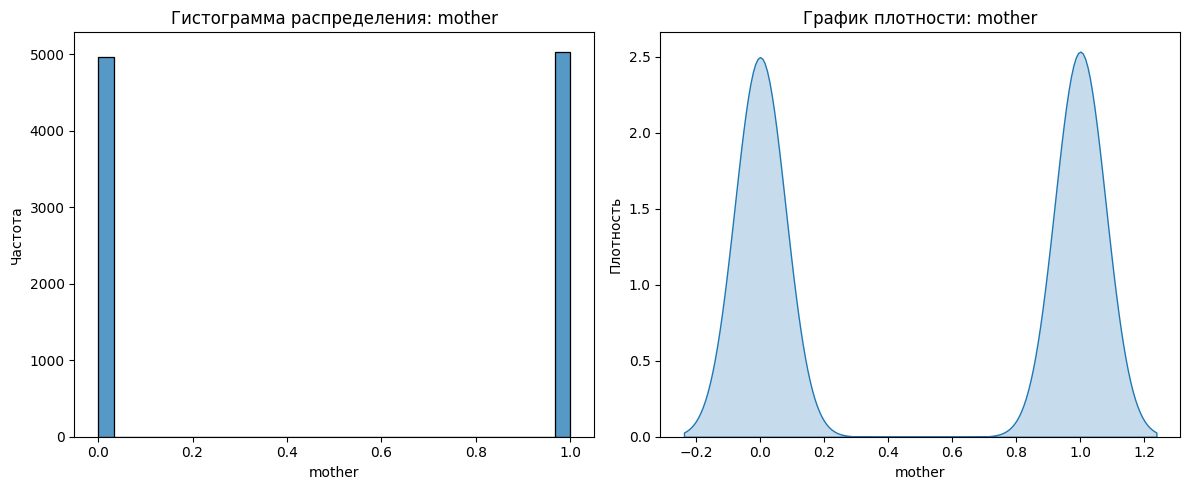

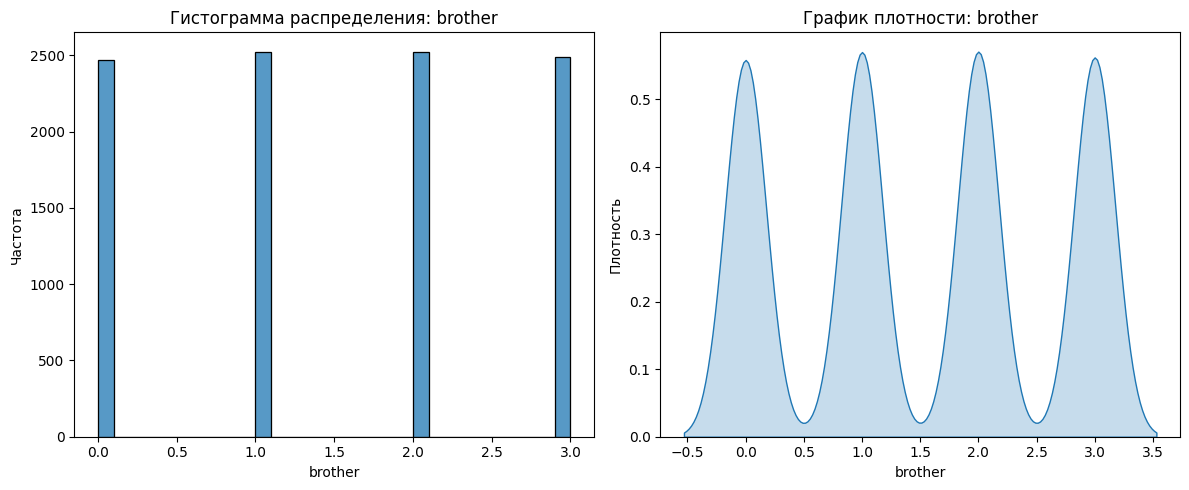

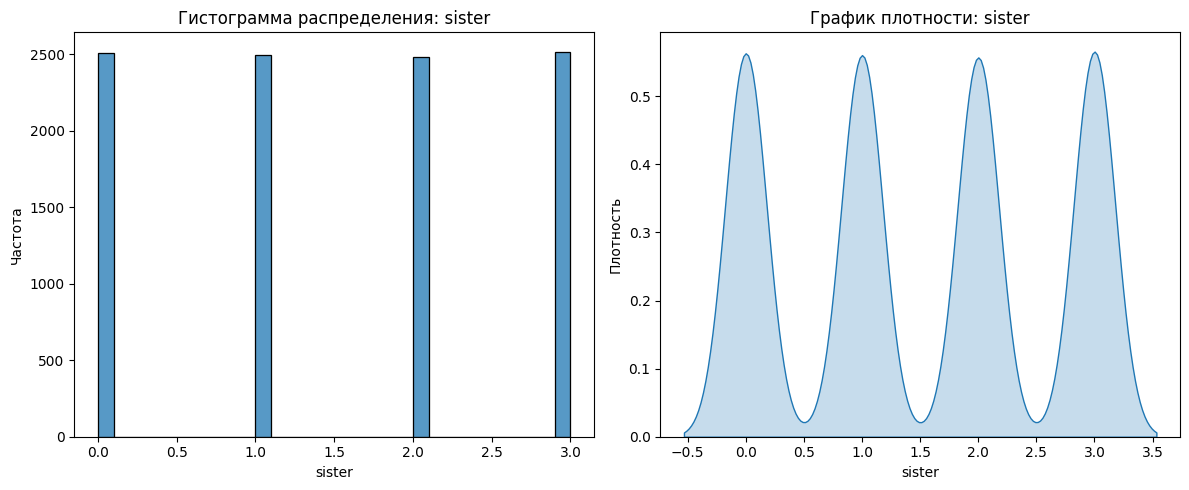

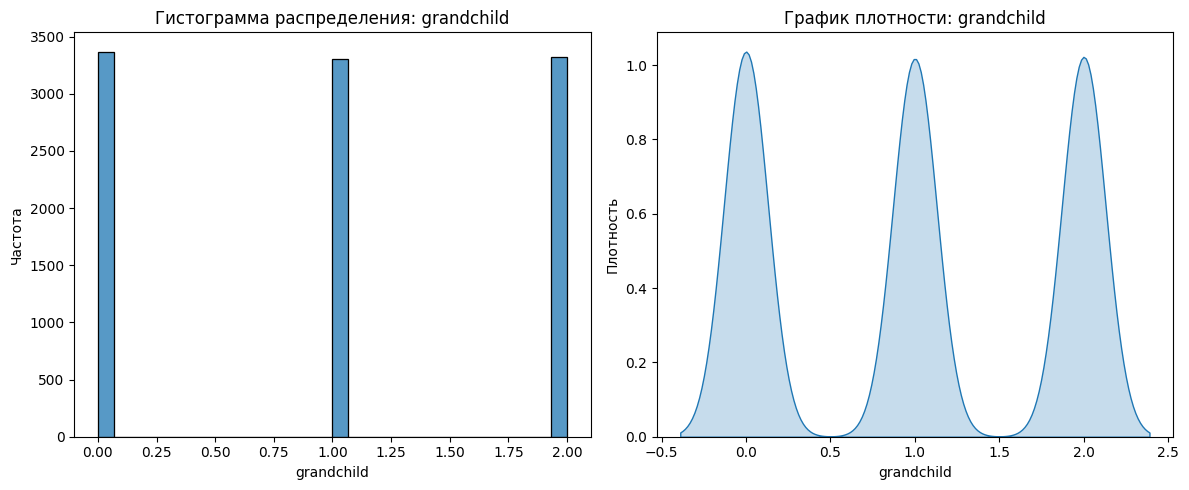

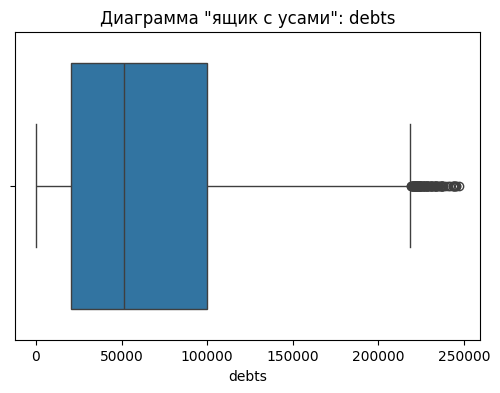

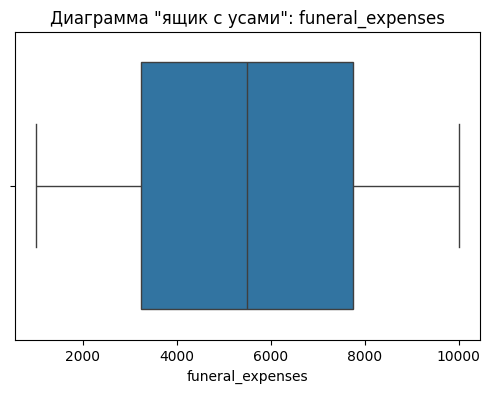

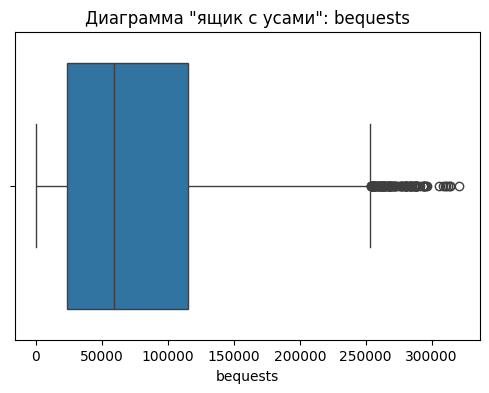

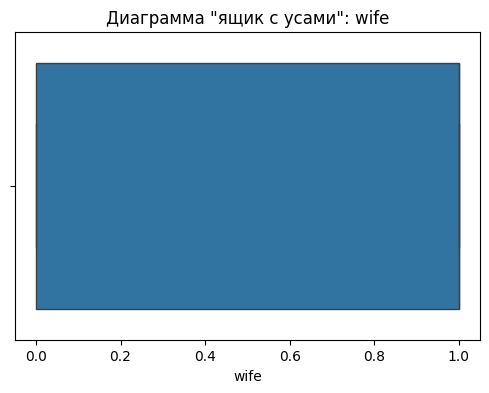

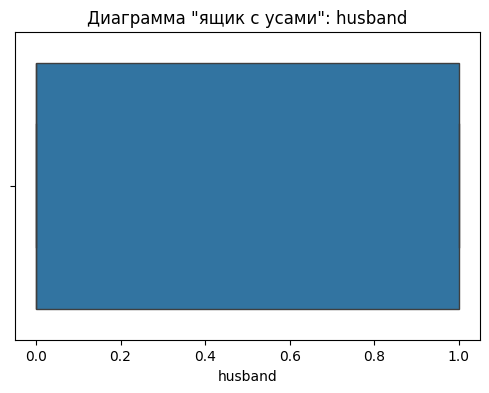

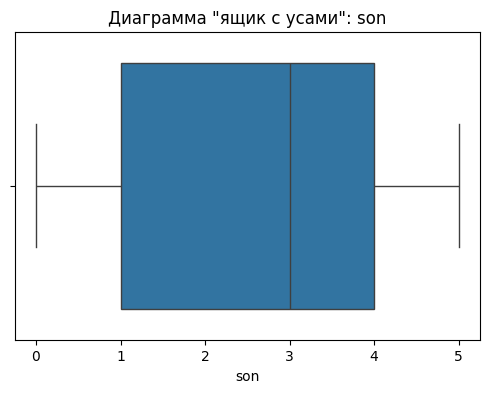

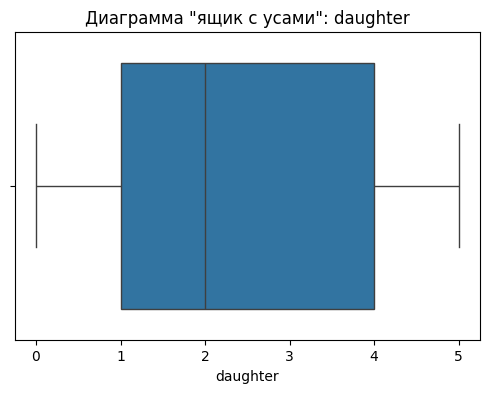

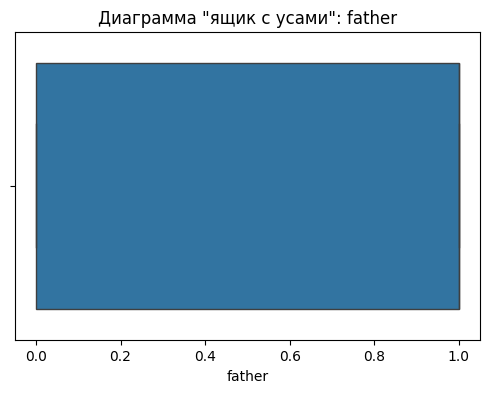

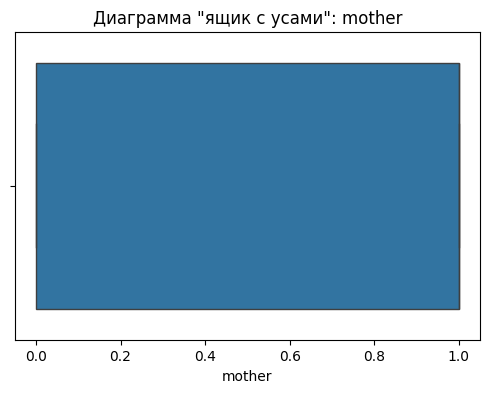

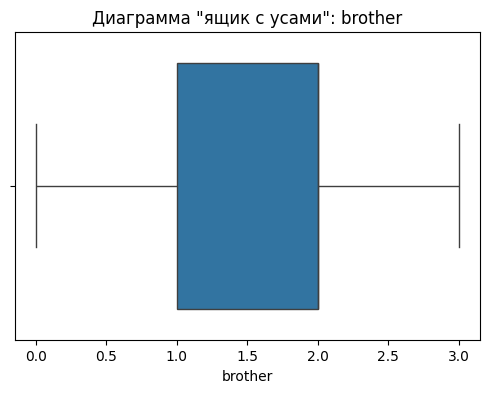

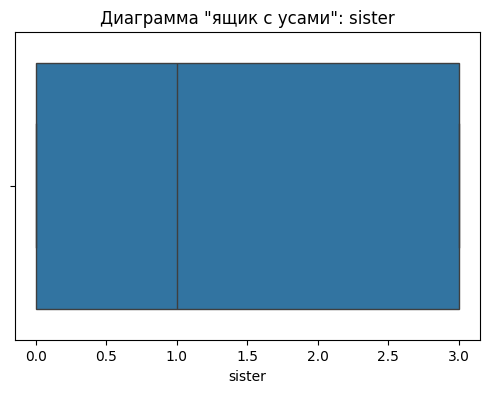

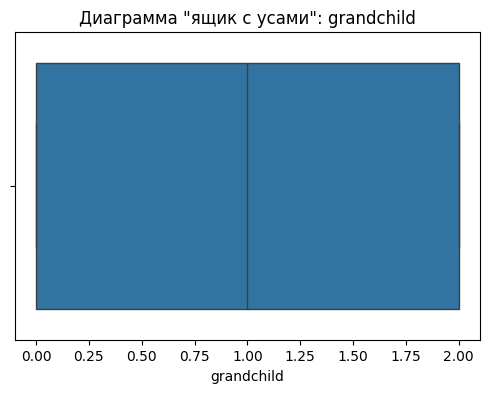


Примеры текстовых описаний:
0    The estate is worth $801,536.08. There are deb...
1    The estate is worth $943,375.41. There are deb...
2    The estate is worth $678,251.95. There are deb...
3    The estate is worth $364,967.06. There are deb...
4    The estate is worth $663,414.47. There are deb...
Name: text, dtype: object


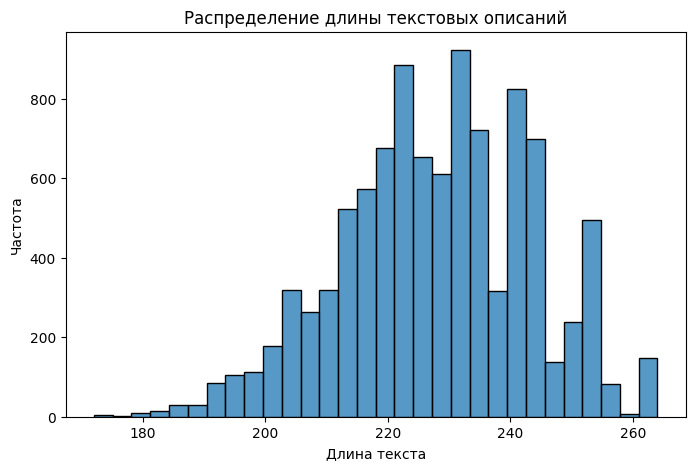

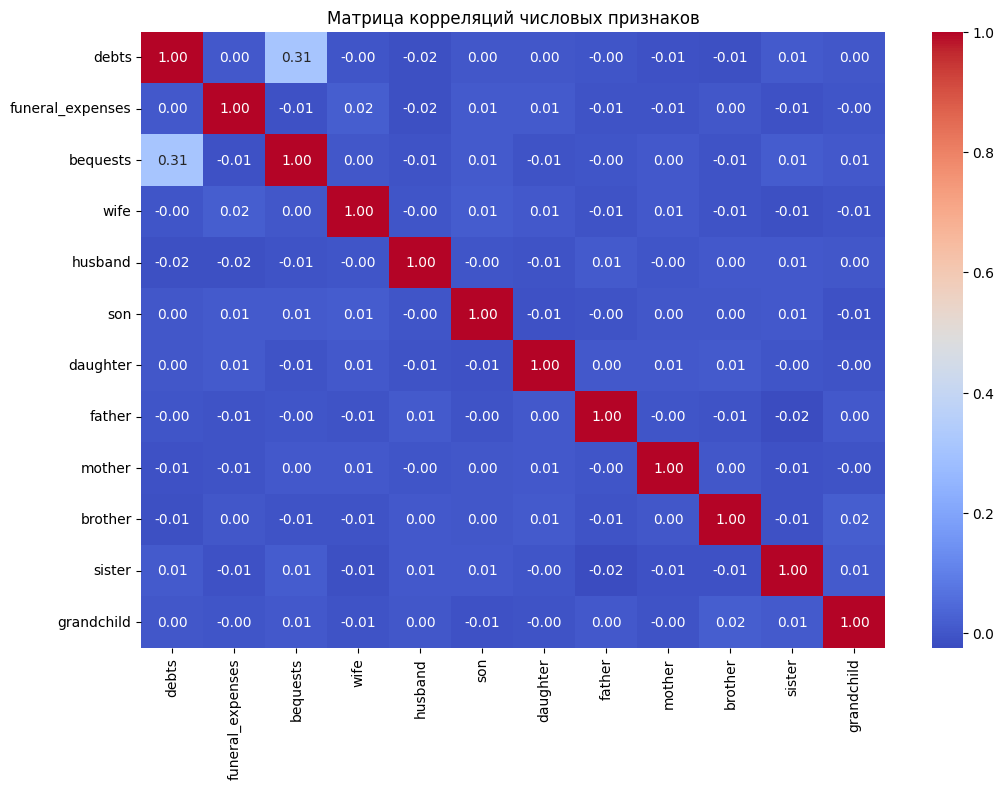

Краткие статистики по числовым признакам:
                debts  funeral_expenses       bequests          wife  \
count   10000.000000      10000.000000   10000.000000  10000.000000   
mean    66114.075550       5494.843407   76554.941016      0.502400   
std     55033.920158       2605.665586   64457.475334      0.500019   
min         2.130000       1000.030000      24.520000      0.000000   
25%     20566.652500       3237.277500   23697.625000      0.000000   
50%     51260.270000       5495.665000   59067.190000      1.000000   
75%     99795.077500       7742.445000  115633.610000      1.000000   
max    246943.130000       9999.530000  320499.220000      1.000000   

            husband          son      daughter        father        mother  \
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean       0.499400      2.51110      2.482200      0.503300      0.503600   
std        0.500025      1.70557      1.691085      0.500014      0.500012   
min  

In [11]:
# --------------------------------------------------------------Лабораторная работа №2: Анализ распределений и корреляций
# ---  Загрузка данных ---
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = pd.read_csv(url)
# ---  Определение числовых и категориальных признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
# Числовые признаки (финансовые и количественные)
numerical_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]

# Категориальные признаки (в данном датасете только текстовое описание)--------------------------------------------------------------------------------------------------------------------------------------------------------
categorical_features = ['text']

# ---  Очистка числовых данных от пропусков -----------------------------------------------------------------------------------------------------------------------------------------------------------
df_num = df[numerical_features].dropna()

# ---  Анализ распределения числовых признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Гистограмма распределения--------------------------------------------------------------------------------------------------------------------------------------------------------
    plt.subplot(1, 2, 1)
    sns.histplot(df_num[feature], bins=30, kde=False)
    plt.title(f'Гистограмма распределения: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    # График плотности--------------------------------------------------------------------------------------------------------------------------------------------------------
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_num[feature], fill=True)
    plt.title(f'График плотности: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# ---  Диаграммы "ящик с усами" для выявления выбросов -----------------------------------------------------------------------------------------------------------------------------------------------------------
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[feature])
    plt.title(f'Диаграмма "ящик с усами": {feature}')
    plt.xlabel(feature)
    plt.show()

# --- Анализ распределения категориальных признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
# Для текстового поля можно вывести несколько примеров и длину текста
print("\nПримеры текстовых описаний:")
print(df['text'].head(5))
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30)
plt.title('Распределение длины текстовых описаний')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

# ---  Анализ взаимосвязей (корреляций) числовых признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# --- Краткие выводы ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Краткие статистики по числовым признакам:\n", df_num.describe())

# Пример анализа:
# - Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.
# - Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.
# - Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.



In [4]:
pip install numpy


In [15]:
#---------------------------------------------------------- Лабораторная работа №3:
# 1. Загрузка и предварительный анализ данных
import numpy as np

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

warnings.filterwarnings('ignore')
try:
    url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
    df = pd.read_csv(url)
except Exception as e:
    print(f"Ошибка загрузки данных: {e}")
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))

# Выбор и проверка признаков
feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]

# Очистка данных
df_clean = df[feature_columns].dropna()

# ------------------------------------------
# 2. Расширенная визуализация данных
# ------------------------------------------
# Распределение ключевых финансовых признаков
plt.figure(figsize=(15,10))
for i, col in enumerate(['debts', 'funeral_expenses', 'bequests'], 1):
    plt.subplot(2,2,i)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Матрица корреляций
plt.figure(figsize=(12,8))
corr_matrix = df_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Матрица корреляций признаков')
plt.show()

# ------------------------------------------
# 3. Подготовка данных для моделирования
# ------------------------------------------
# Создание бинарного целевого признака (пример: высокое завещание)
median_bequest = df_clean['bequests'].median()
df_clean['high_bequest'] = (df_clean['bequests'] >= median_bequest).astype(int)

X = df_clean.drop(columns=['high_bequest', 'bequests'])  # Исключаем целевую переменную
y = df_clean['high_bequest']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------
# 4. Сравнение нескольких моделей
# ------------------------------------------
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

    # Матрица ошибок
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок ({name})')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()

# ------------------------------------------
# 5. Оптимизация гиперпараметров для KNN
# ------------------------------------------
param_grid = {
    'n_neighbors': range(3,15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
print(f'\nЛучшие параметры KNN: {grid_search.best_params_}')

# ------------------------------------------
# 6. Анализ важности признаков
# ------------------------------------------
forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
forest.fit(X_train_scaled, y_train)

plt.figure(figsize=(10,6))
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Важность признаков (Random Forest)')
plt.xlabel('Важность')
plt.show()

# ------------------------------------------
# 7. Расширенная визуализация с PCA и t-SNE
# ------------------------------------------
# PCA для 3D визуализации
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_train, cmap='viridis')
plt.title('3D визуализация PCA (финансовые данные)')
plt.colorbar(scatter)
plt.show()

# t-SNE визуализация
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.title('t-SNE визуализация распределения классов')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


NameError: name 'corr_matrix' is not defined

Размер данных: (10000, 13)
Пример данных:
                                                text      debts  \
0  The estate is worth $801,536.08. There are deb...  136423.38   
1  The estate is worth $943,375.41. There are deb...  178819.05   
2  The estate is worth $678,251.95. There are deb...  137791.13   
3  The estate is worth $364,967.06. There are deb...   74310.09   
4  The estate is worth $663,414.47. There are deb...    2302.81   

   funeral_expenses   bequests  wife  husband  son  daughter  father  mother  \
0           7866.29   70554.96     1        0    5         4       0       0   
1           9078.99  150491.37     1        1    4         5       0       1   
2           6276.24   19846.02     1        1    3         5       0       0   
3           9243.89   81648.92     0        0    4         0       0       0   
4           7015.85   15827.62     1        1    3         2       1       0   

   brother  sister  grandchild  
0        2       0           2  
1       

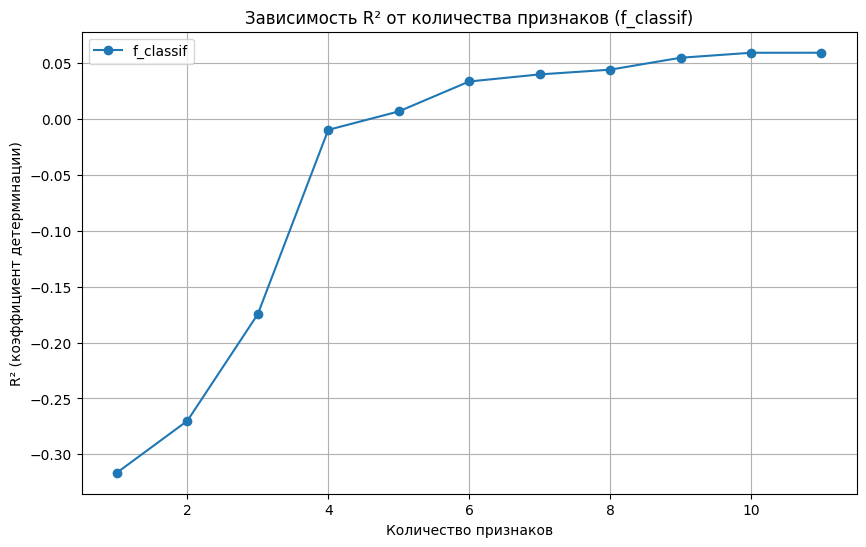

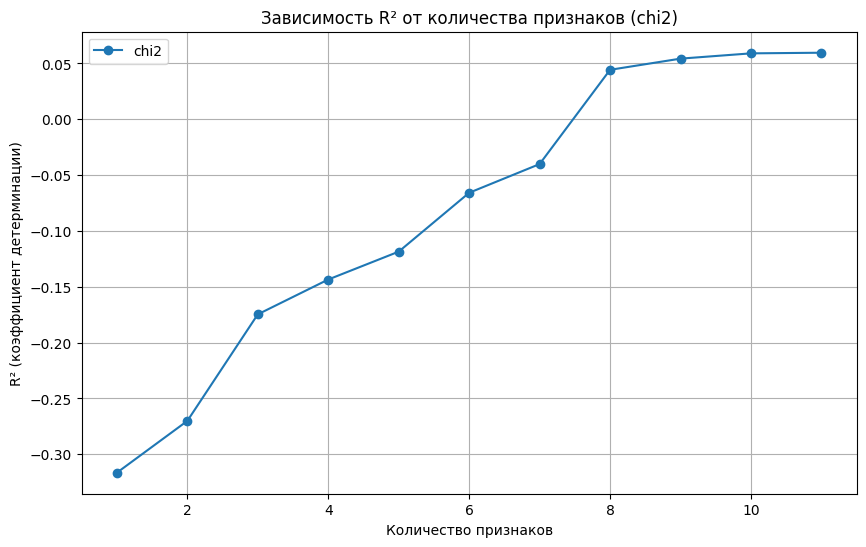

   Количество признаков  R² (f_classif)  \
0                     1       -0.316466   
1                     2       -0.270069   
2                     3       -0.174615   
3                     4       -0.009695   
4                     5        0.006804   
5                     6        0.033595   
6                     7        0.039927   
7                     8        0.044158   
8                     9        0.054841   
9                    10        0.059293   

                      Выбранные признаки (f_classif)  R² (chi2)  \
0                                           bequests  -0.316466   
1                                   bequests, mother  -0.270069   
2                          bequests, mother, brother  -0.174636   
3        funeral_expenses, bequests, mother, brother  -0.143451   
4  funeral_expenses, bequests, husband, mother, b...  -0.118492   
5  funeral_expenses, bequests, husband, mother, b...  -0.065781   
6  funeral_expenses, bequests, husband, father, m...  -0.

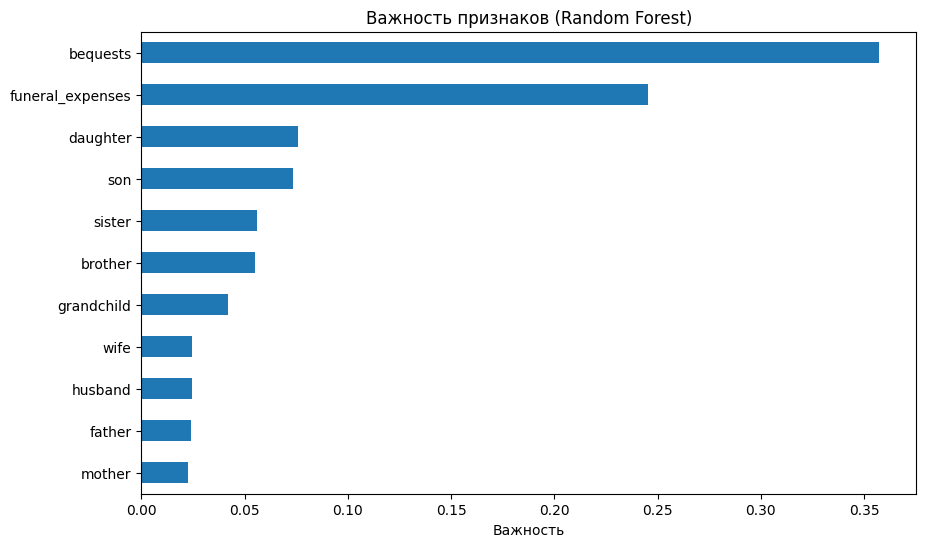

In [6]:
#---------------------------------------------------------- Лабораторная работа №4:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ------------------------------------------
# 1. Загрузка данных
# ------------------------------------------
try:
    url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
    df = pd.read_csv(url)
except Exception as e:
    print(f"Ошибка загрузки данных: {e}")
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))

print("Размер данных:", df.shape)
print("Пример данных:")
print(df.head())

# ------------------------------------------
# 2. Выбор нужных столбцов и очистка
# ------------------------------------------
feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]

df_selected = df[feature_columns]

# Проверяем пропуски и заполняем медианой
df_selected.fillna(df_selected.median(), inplace=True)

# ------------------------------------------
# 3. Определение целевой переменной
# ------------------------------------------
# Для примера создадим бинарную целевую переменную: высокие долги или нет
median_debts = df_selected['debts'].median()
df_selected['high_debts'] = (df_selected['debts'] >= median_debts).astype(int)

X = df_selected.drop(columns=['high_debts', 'debts'])
y = df_selected['high_debts']

# ------------------------------------------
# 4. Разделение и масштабирование
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_std = StandardScaler()
X_train_scaled = scaler_std.fit_transform(X_train)
X_test_scaled = scaler_std.transform(X_test)

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# ------------------------------------------
# 5. Функция для оценки выбора признаков и визуализации
# ------------------------------------------
def evaluate_feature_selection(score_func, score_func_name, X_train, X_test, y_train, y_test, feature_names, max_features=12):
    feature_counts = list(range(1, min(X_train.shape[1], max_features) + 1))
    scores = []
    selected_features_dict = {}

    for k in feature_counts:
        selector = SelectKBest(score_func, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)

        model = RandomForestRegressor(random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)

        r2 = r2_score(y_test, y_pred)
        scores.append(r2)

        selected = [f for f, s in zip(feature_names, selector.get_support()) if s]
        selected_features_dict[k] = selected

    plt.figure(figsize=(10,6))
    plt.plot(feature_counts, scores, marker='o', label=score_func_name)
    plt.xlabel('Количество признаков')
    plt.ylabel('R² (коэффициент детерминации)')
    plt.title(f'Зависимость R² от количества признаков ({score_func_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return feature_counts, scores, selected_features_dict

# ------------------------------------------
# 6. Оценка с f_classif
# ------------------------------------------
feature_names = X.columns.tolist()

fc_counts, fc_scores, fc_features = evaluate_feature_selection(
    f_classif, 'f_classif', X_train_scaled, X_test_scaled, y_train, y_test, feature_names
)

# ------------------------------------------
# 7. Оценка с chi2
# ------------------------------------------
chi_counts, chi_scores, chi_features = evaluate_feature_selection(
    chi2, 'chi2', X_train_minmax, X_test_minmax, y_train, y_test, feature_names
)

# ------------------------------------------
# 8. Итоговая таблица результатов
# ------------------------------------------
results_df = pd.DataFrame({
    'Количество признаков': fc_counts,
    'R² (f_classif)': fc_scores,
    'Выбранные признаки (f_classif)': [", ".join(fc_features[k]) for k in fc_counts],
    'R² (chi2)': chi_scores,
    'Выбранные признаки (chi2)': [", ".join(chi_features[k]) for k in chi_counts],
})

print(results_df.head(10))

results_df.to_csv('feature_selection_results.csv', index=False)
print("Результаты сохранены в 'feature_selection_results.csv'")

# ------------------------------------------
# 9. Важность признаков с RandomForest
# ------------------------------------------
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)

importances = pd.Series(model_rf.feature_importances_, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10,6))
importances.plot(kind='barh')
plt.title('Важность признаков (Random Forest)')
plt.xlabel('Важность')
plt.show()


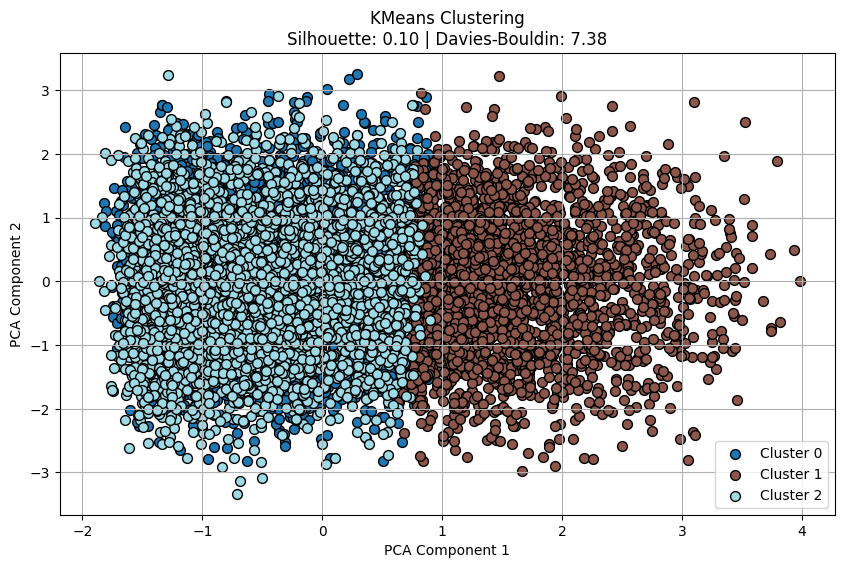

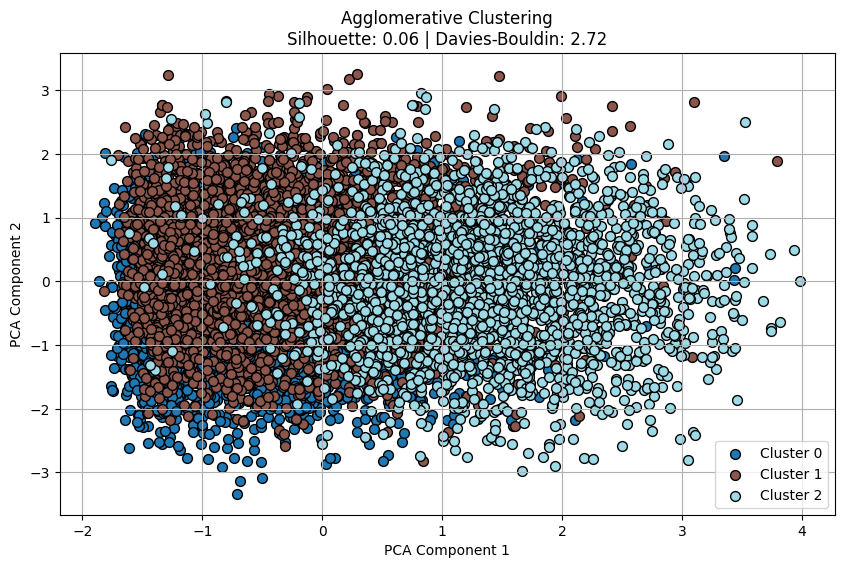

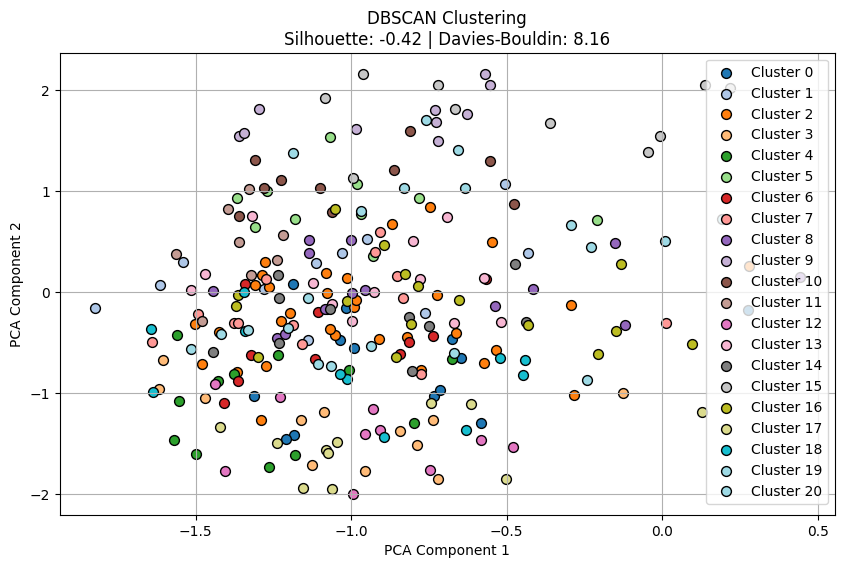


Сводная таблица метрик:
               Silhouette  Davies-Bouldin  Dunn Index
KMeans           0.075682        2.997637    0.066710
Agglomerative    0.058908        3.286476    0.125469
DBSCAN          -0.293232        1.664817    0.244239


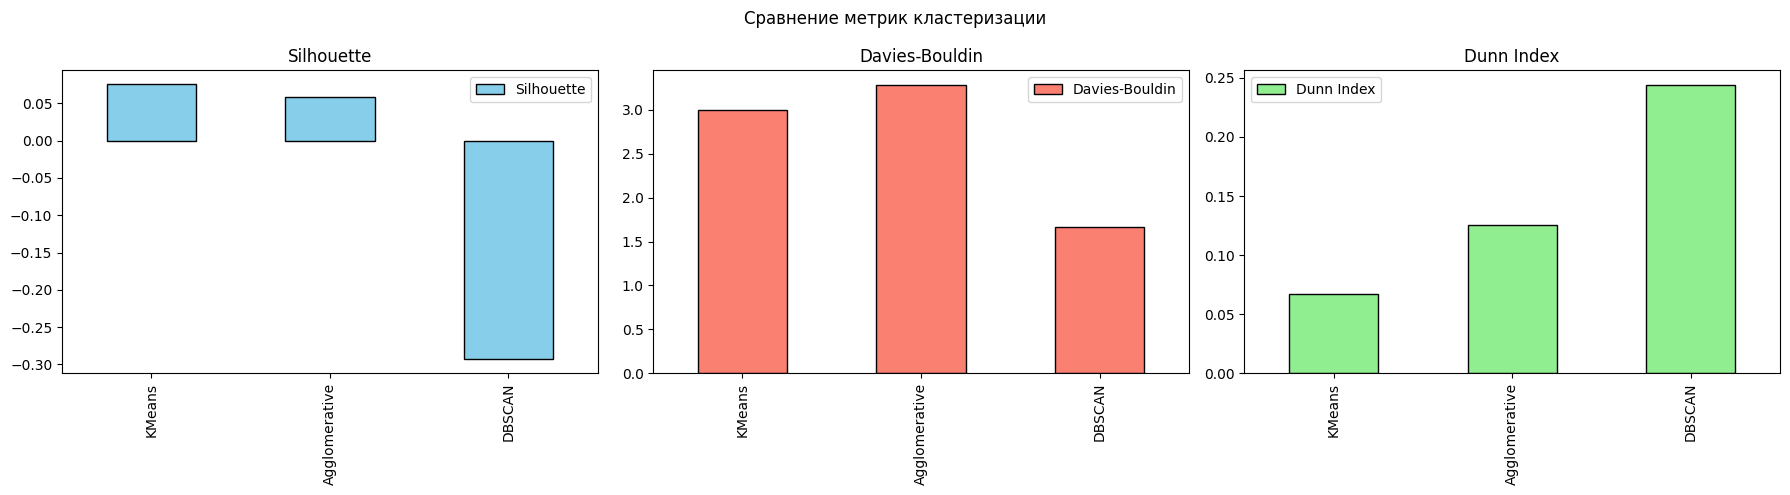

In [5]:
#---------------------------------------------------------- Лабораторная работа №5:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    pairwise_distances,
)

# ------------------------------------------
# 1. Загрузка и подготовка данных
# ------------------------------------------
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = pd.read_csv(url)

# Выбор нужных столбцов
feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]

# Обработка пропусков и масштабирование
X = df[feature_columns].dropna().copy()
X.fillna(X.median(), inplace=True)  # Заполнение пропусков медианой

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# ------------------------------------------
# 2. PCA для визуализации
# ------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# ------------------------------------------
# 3. Функции для оценки кластеризации
# ------------------------------------------
def evaluate_clustering(X, labels):
    if len(set(labels)) <= 1 or (set(labels) == {-1}):
        return None, None, None
    return (
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    )

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) <= 1 or (set(unique_clusters) == {-1}):
        return None

    distances = pairwise_distances(X)
    intra_dists = []
    inter_dists = []

    for c in unique_clusters:
        if c == -1: continue
        indices = np.where(labels == c)[0]
        if len(indices) > 1:
            intra_dists.append(np.max(distances[np.ix_(indices, indices)]))

    for i in range(len(unique_clusters)):
        for j in range(i+1, len(unique_clusters)):
            if -1 in (unique_clusters[i], unique_clusters[j]): continue
            i_idx = np.where(labels == unique_clusters[i])[0]
            j_idx = np.where(labels == unique_clusters[j])[0]
            inter_dists.append(np.min(distances[np.ix_(i_idx, j_idx)]))

    return min(inter_dists)/max(intra_dists) if intra_dists and inter_dists else None

def plot_clusters(pca_data, labels, title):
    unique_labels = set(labels) - {-1}
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(10,6))
    for k, col in zip(unique_labels, colors):
        mask = (labels == k)
        plt.scatter(pca_data[mask,0], pca_data[mask,1],
                    c=[col],
                    label=f'Cluster {k}' if k != -1 else 'Noise',
                    s=50, edgecolor='k')

    sil, ch, db = evaluate_clustering(pca_data, labels)
    metrics = f"Silhouette: {sil:.2f} | Davies-Bouldin: {db:.2f}" if sil else ""
    plt.title(f"{title}\n{metrics}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------------------------
# 4. Кластеризация и визуализация
# ------------------------------------------
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_data)
plot_clusters(pca_data, labels_kmeans, "KMeans Clustering")

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(scaled_data)
plot_clusters(pca_data, labels_agglo, "Agglomerative Clustering")

# DBSCAN (оптимизированные параметры)
db = DBSCAN(eps=1.5, min_samples=10)
labels_dbscan = db.fit_predict(scaled_data)
plot_clusters(pca_data, labels_dbscan, "DBSCAN Clustering")

# ------------------------------------------
# 5. Сравнение метрик
# ------------------------------------------
metrics = {
    'Silhouette': [
        silhouette_score(scaled_data, labels_kmeans),
        silhouette_score(scaled_data, labels_agglo),
        silhouette_score(scaled_data, labels_dbscan)
    ],
    'Davies-Bouldin': [
        davies_bouldin_score(scaled_data, labels_kmeans),
        davies_bouldin_score(scaled_data, labels_agglo),
        davies_bouldin_score(scaled_data, labels_dbscan)
    ],
    'Dunn Index': [
        dunn_index(scaled_data, labels_kmeans),
        dunn_index(scaled_data, labels_agglo),
        dunn_index(scaled_data, labels_dbscan)
    ]
}

results_df = pd.DataFrame(metrics, index=['KMeans', 'Agglomerative', 'DBSCAN'])
print("\nСводная таблица метрик:")
print(results_df)

# Визуализация метрик
results_df.plot(kind='bar', subplots=True, layout=(1,3), figsize=(18,5),
                color=['skyblue', 'salmon', 'lightgreen'], edgecolor='k')
plt.suptitle("Сравнение метрик кластеризации")
plt.tight_layout()
plt.show()
